In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.graphics.tsaplots as sgt
import statsmodels.tsa.stattools as sts
from statsmodels.tsa.arima_model import ARIMA
from scipy.stats.distributions import chi2
from statsmodels.tsa.seasonal import seasonal_decompose
from math import sqrt
import seaborn as sns
sns.set()
from IPython.display import display, Math, Latex

In [ ]:
df = pd.read_csv('/content/AAPL.csv')

In [ ]:
df.head()


,Date,Open,High,Low,Close,Adj Close,Volume
0,2020-01-27,77.514999,77.942497,76.220001,77.237503,75.667847,161940000
1,2020-01-28,78.150002,79.599998,78.047501,79.422501,77.808441,162234000
2,2020-01-29,81.112503,81.962502,80.345001,81.084999,79.437149,216229200
3,2020-01-30,80.135002,81.022499,79.687500,80.967499,79.322029,126743200
4,2020-01-31,80.232498,80.669998,77.072502,77.377502,75.805000,199588400


In [ ]:
df.tail()

,Date,Open,High,Low,Close,Adj Close,Volume
725,2022-12-09,142.339996,145.570007,140.899994,142.160004,142.160004,76097000
726,2022-12-12,142.699997,144.500000,141.059998,144.490005,144.490005,70462700
727,2022-12-13,149.500000,149.970001,144.240005,145.470001,145.470001,93886200
728,2022-12-14,145.350006,146.660004,141.160004,143.210007,143.210007,82291200
729,2022-12-15,141.110001,141.800003,136.029999,136.500000,136.500000,98931900


In [ ]:
df.describe()

,Open,High,Low,Close,Adj Close,Volume
count,730.000000,730.000000,730.000000,730.000000,730.000000,7.300000e+02
mean,131.369860,133.053647,129.733637,131.451959,130.424592,1.120849e+08
std,30.107256,30.331018,29.830192,30.085579,30.325770,5.671562e+07
min,57.020000,57.125000,53.152500,56.092499,55.082977,3.519590e+07
25%,117.207502,118.867502,115.637499,116.647499,115.206159,7.623688e+07
50%,136.965004,138.689995,134.970001,137.025002,135.921502,9.463260e+07
75%,150.945004,152.647499,149.355000,151.052505,150.502838,1.280935e+08
max,182.630005,182.940002,179.119995,182.009995,180.959732,4.265100e+08


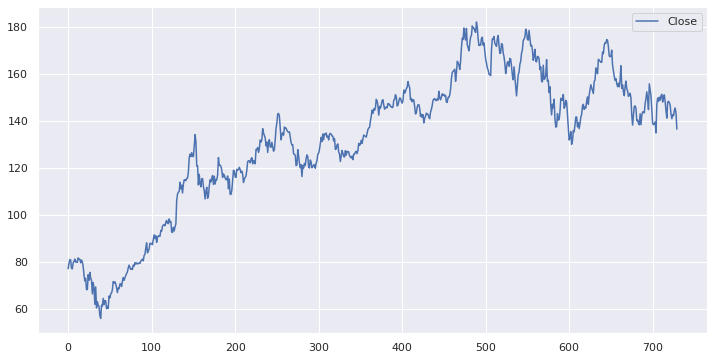

In [ ]:
df[['Close']].plot(figsize=(12,6));


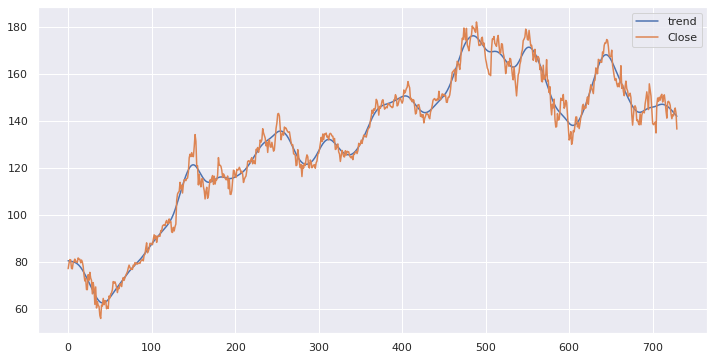

In [ ]:
from statsmodels.tsa.filters.hp_filter import hpfilter
gdp_cycle, gdp_trend = hpfilter(df['Close'], lamb=1600)
df['trend'] = gdp_trend
df[['trend','Close']].plot(figsize=(12,6))
#tendencia

In [ ]:
sts.adfuller(df.Close)
#no se rechaza la hipotesis nula
#la serie no es estacionaria

(-1.820259521408678,
 0.3704507984198111,
 1,
 728,
 {'1%': -3.4393644334758475,
  '5%': -2.8655182850048306,
  '10%': -2.568888486973192},
 3493.441573074577)

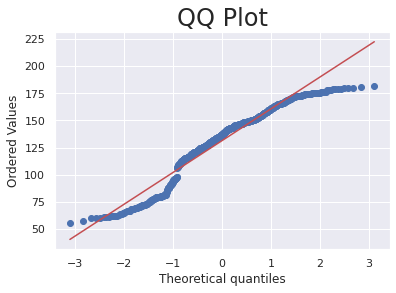

In [ ]:
import scipy.stats

scipy.stats.probplot(df.Close, plot =  plt)
plt.title("QQ Plot", size = 24)
plt.show()

In [ ]:
df['returns'] = df.Close.pct_change(1)*100

In [ ]:
df['sq_returns'] = df.returns.mul(df.returns)


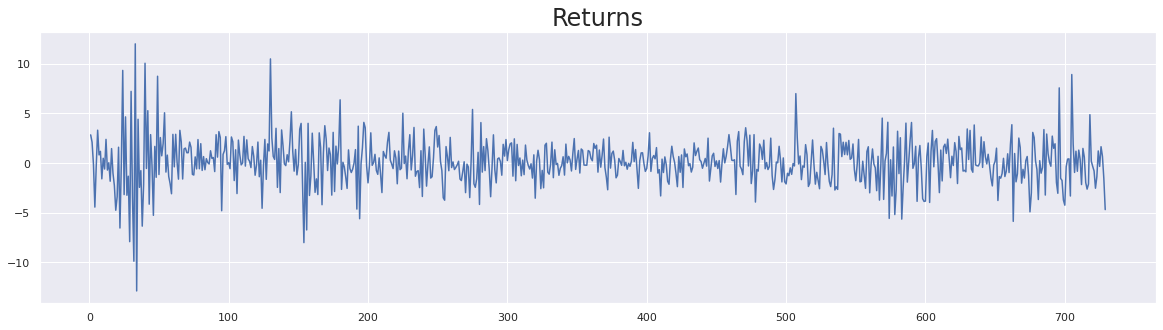

In [ ]:
df.returns.plot(figsize=(20,5))
plt.title("Returns", size = 24)
plt.show()

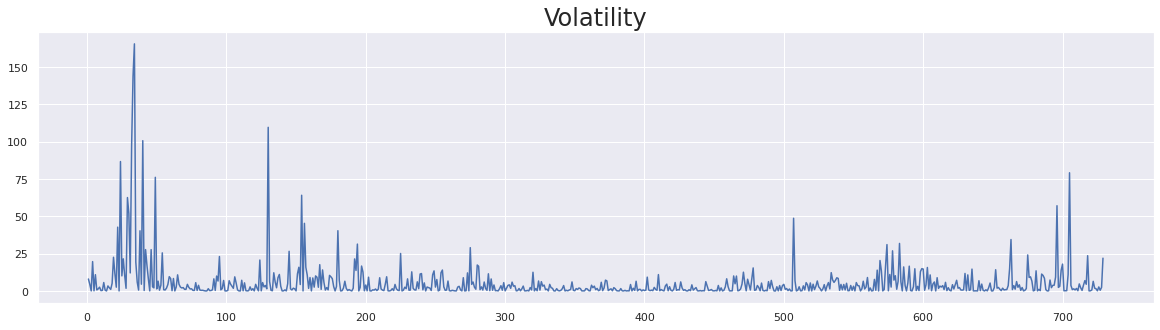

In [ ]:
df.sq_returns.plot(figsize=(20,5))
plt.title("Volatility", size = 24)
plt.show()

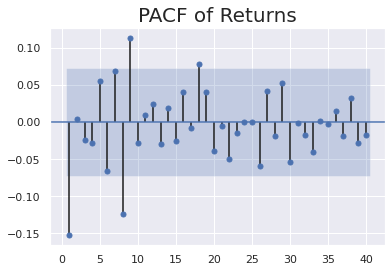

In [ ]:
sgt.plot_pacf(df.returns[1:], lags = 40, alpha = 0.05, zero = False , method = ('ols'))
plt.title("PACF of Returns", size = 20)
plt.show()

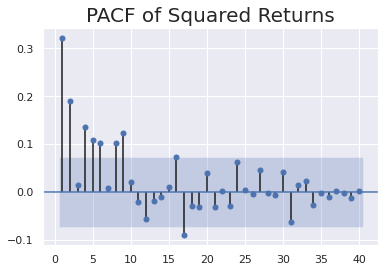

In [ ]:
sgt.plot_pacf(df.sq_returns[1:], lags = 40, alpha = 0.05, zero = False , method = ('ols'))
plt.title("PACF of Squared Returns", size = 20)
plt.show()

In [ ]:
!pip install arch


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 907.3/907.3 KB 13.1 MB/s eta 0:00:00


In [ ]:
from arch import arch_model


In [ ]:
display(Math(r'\sigma_{t}^2 = \omega_0 + \sum_{i=1}^p \alpha_1\in_{t-1}^2'))
#Modelo ARCH

<IPython.core.display.Math object>

In [ ]:
model_arch_1 = arch_model(df.returns[1:], mean = "Constant", vol = "ARCH", p = 1)
results_arch_1 = model_arch_1.fit(update_freq = 1)
results_arch_1.summary()

Iteration:      1,   Func. Count:      5,   Neg. LLF: 2970.4268755137086
Iteration:      2,   Func. Count:     11,   Neg. LLF: 1670.657828364151
Iteration:      3,   Func. Count:     17,   Neg. LLF: 549945.0933269612
Iteration:      4,   Func. Count:     23,   Neg. LLF: 1628.817971228909
Iteration:      5,   Func. Count:     27,   Neg. LLF: 1628.8177035857188
Iteration:      6,   Func. Count:     30,   Neg. LLF: 1628.8177035857468
Optimization terminated successfully    (Exit mode 0)
            Current function value: 1628.8177035857188
            Iterations: 6
            Function evaluations: 30
            Gradient evaluations: 6


<class 'statsmodels.iolib.summary.Summary'>
"""
                      Constant Mean - ARCH Model Results                      
==============================================================================
Dep. Variable:                returns   R-squared:                       0.000
Mean Model:             Constant Mean   Adj. R-squared:                  0.000
Vol Model:                       ARCH   Log-Likelihood:               -1628.82
Distribution:                  Normal   AIC:                           3263.64
Method:            Maximum Likelihood   BIC:                           3277.41
                                        No. Observations:                  729
Date:                Wed, Jan 25 2023   Df Residuals:                      728
Time:                        03:06:12   Df Model:                            1
                                 Mean Model                                
===========================================================================
                 coef    std err          t      P>|t|     95.0% Conf. Int.
---------------------------------------------------------------------------
mu             0.1580  8.366e-02      1.889  5.892e-02 [-5.954e-03,  0.322]
                             Volatility Model                             
==========================================================================
                 coef    std err          t      P>|t|    95.0% Conf. Int.
--------------------------------------------------------------------------
omega          4.2226      0.427      9.878  5.204e-23   [  3.385,  5.061]
alpha[1]       0.2195  7.595e-02      2.890  3.849e-03 [7.066e-02,  0.368]
==========================================================================

Covariance estimator: robust
"""

In [ ]:
model_arch_2 = arch_model(df.returns[1:], mean = "Constant", vol = "ARCH", p = 2)
results_arch_2 = model_arch_2.fit(update_freq = 5)
results_arch_2.summary()

Iteration:      5,   Func. Count:     34,   Neg. LLF: 1606.7586510074511
Optimization terminated successfully    (Exit mode 0)
            Current function value: 1605.8955839611913
            Iterations: 7
            Function evaluations: 44
            Gradient evaluations: 7


<class 'statsmodels.iolib.summary.Summary'>
"""
                      Constant Mean - ARCH Model Results                      
==============================================================================
Dep. Variable:                returns   R-squared:                       0.000
Mean Model:             Constant Mean   Adj. R-squared:                  0.000
Vol Model:                       ARCH   Log-Likelihood:               -1605.90
Distribution:                  Normal   AIC:                           3219.79
Method:            Maximum Likelihood   BIC:                           3238.16
                                        No. Observations:                  729
Date:                Wed, Jan 25 2023   Df Residuals:                      728
Time:                        03:06:20   Df Model:                            1
                                Mean Model                                
==========================================================================
                 coef    std err          t      P>|t|    95.0% Conf. Int.
--------------------------------------------------------------------------
mu             0.1504  7.478e-02      2.010  4.438e-02 [3.779e-03,  0.297]
                             Volatility Model                             
==========================================================================
                 coef    std err          t      P>|t|    95.0% Conf. Int.
--------------------------------------------------------------------------
omega          3.1807      0.369      8.630  6.131e-18   [  2.458,  3.903]
alpha[1]       0.1796  6.683e-02      2.688  7.182e-03 [4.867e-02,  0.311]
alpha[2]       0.2348  6.902e-02      3.401  6.703e-04 [9.949e-02,  0.370]
==========================================================================

Covariance estimator: robust
"""

In [ ]:
model_arch_3 = arch_model(df.returns[1:], mean = "Constant", vol = "ARCH", p = 3)
results_arch_3 = model_arch_3.fit(update_freq = 5)
results_arch_3.summary()

Iteration:      5,   Func. Count:     39,   Neg. LLF: 1608.1207626196772
Optimization terminated successfully    (Exit mode 0)
            Current function value: 1600.8936186253623
            Iterations: 9
            Function evaluations: 65
            Gradient evaluations: 9


<class 'statsmodels.iolib.summary.Summary'>
"""
                      Constant Mean - ARCH Model Results                      
==============================================================================
Dep. Variable:                returns   R-squared:                       0.000
Mean Model:             Constant Mean   Adj. R-squared:                  0.000
Vol Model:                       ARCH   Log-Likelihood:               -1600.89
Distribution:                  Normal   AIC:                           3211.79
Method:            Maximum Likelihood   BIC:                           3234.75
                                        No. Observations:                  729
Date:                Wed, Jan 25 2023   Df Residuals:                      728
Time:                        03:06:26   Df Model:                            1
                                Mean Model                                
==========================================================================
                 coef    std err          t      P>|t|    95.0% Conf. Int.
--------------------------------------------------------------------------
mu             0.1567  7.518e-02      2.085  3.711e-02 [9.369e-03,  0.304]
                              Volatility Model                             
===========================================================================
                 coef    std err          t      P>|t|     95.0% Conf. Int.
---------------------------------------------------------------------------
omega          2.7890      0.368      7.571  3.707e-14    [  2.067,  3.511]
alpha[1]       0.1641  7.153e-02      2.294  2.178e-02  [2.391e-02,  0.304]
alpha[2]       0.1924  6.066e-02      3.173  1.510e-03  [7.357e-02,  0.311]
alpha[3]       0.1345  7.134e-02      1.885  5.937e-02 [-5.317e-03,  0.274]
===========================================================================

Covariance estimator: robust
"""

In [ ]:
model_arch_13 = arch_model(df.returns[1:], mean = "Constant", vol = "ARCH", p = 13)
results_arch_13 = model_arch_13.fit(update_freq = 5)
results_arch_13.summary()

Iteration:      5,   Func. Count:     87,   Neg. LLF: 3871.3985331056847
Iteration:     10,   Func. Count:    174,   Neg. LLF: 1585.5220054575407
Iteration:     15,   Func. Count:    262,   Neg. LLF: 1578.8159581604154
Iteration:     20,   Func. Count:    348,   Neg. LLF: 1576.7319634542503
Iteration:     25,   Func. Count:    433,   Neg. LLF: 1576.6193508005354
Optimization terminated successfully    (Exit mode 0)
            Current function value: 1576.6193377606446
            Iterations: 28
            Function evaluations: 481
            Gradient evaluations: 28


<class 'statsmodels.iolib.summary.Summary'>
"""
                      Constant Mean - ARCH Model Results                      
==============================================================================
Dep. Variable:                returns   R-squared:                       0.000
Mean Model:             Constant Mean   Adj. R-squared:                  0.000
Vol Model:                       ARCH   Log-Likelihood:               -1576.62
Distribution:                  Normal   AIC:                           3183.24
Method:            Maximum Likelihood   BIC:                           3252.11
                                        No. Observations:                  729
Date:                Wed, Jan 25 2023   Df Residuals:                      728
Time:                        03:06:33   Df Model:                            1
                                Mean Model                                
==========================================================================
                 coef    std err          t      P>|t|    95.0% Conf. Int.
--------------------------------------------------------------------------
mu             0.1844  8.055e-02      2.289  2.209e-02 [2.649e-02,  0.342]
                               Volatility Model                              
=============================================================================
                 coef    std err          t      P>|t|       95.0% Conf. Int.
-----------------------------------------------------------------------------
omega          1.5307      0.421      3.634  2.790e-04      [  0.705,  2.356]
alpha[1]       0.0876  6.497e-02      1.349      0.177   [-3.973e-02,  0.215]
alpha[2]       0.1510  6.453e-02      2.340  1.929e-02    [2.452e-02,  0.277]
alpha[3]   8.1678e-04  6.706e-02  1.218e-02      0.990      [ -0.131,  0.132]
alpha[4]       0.0446  3.645e-02      1.224      0.221   [-2.682e-02,  0.116]
alpha[5]       0.1337  6.269e-02      2.132  3.299e-02    [1.080e-02,  0.257]
alpha[6]       0.1188  8.706e-02      1.365      0.172   [-5.181e-02,  0.289]
alpha[7]       0.0264  4.205e-02      0.628      0.530   [-5.603e-02,  0.109]
alpha[8]       0.0331  3.793e-02      0.873      0.383   [-4.123e-02,  0.107]
alpha[9]       0.0173  4.809e-02      0.359      0.720   [-7.699e-02,  0.112]
alpha[10]      0.0117  3.814e-02      0.307      0.759 [-6.305e-02,8.646e-02]
alpha[11]      0.0611  5.025e-02      1.217      0.224   [-3.734e-02,  0.160]
alpha[12]  7.8102e-03  3.064e-02      0.255      0.799 [-5.224e-02,6.786e-02]
alpha[13]      0.0258  3.459e-02      0.747      0.455 [-4.197e-02,9.362e-02]
=============================================================================

Covariance estimator: robust
"""

In [ ]:
display(Math(r'\sigma_t^2 = \Omega + \sum_{i=1}^p\alpha_1\in_{t-1}^2 + \sum_{j=1}^p\beta_1\sigma_{t-1}^2'))
#Modelo GARCH

<IPython.core.display.Math object>

In [ ]:
model_garch_1_1 = arch_model(df.returns[1:], mean = "Constant", vol = "GARCH", p = 1, q = 1)
results_garch_1_1 = model_garch_1_1.fit(update_freq = 5)
results_garch_1_1.summary()

Iteration:      5,   Func. Count:     37,   Neg. LLF: 1580.7797874791922
Iteration:     10,   Func. Count:     61,   Neg. LLF: 1580.7718392769375
Optimization terminated successfully    (Exit mode 0)
            Current function value: 1580.7718392767786
            Iterations: 10
            Function evaluations: 61
            Gradient evaluations: 10


<class 'statsmodels.iolib.summary.Summary'>
"""
                     Constant Mean - GARCH Model Results                      
==============================================================================
Dep. Variable:                returns   R-squared:                       0.000
Mean Model:             Constant Mean   Adj. R-squared:                  0.000
Vol Model:                      GARCH   Log-Likelihood:               -1580.77
Distribution:                  Normal   AIC:                           3169.54
Method:            Maximum Likelihood   BIC:                           3187.91
                                        No. Observations:                  729
Date:                Wed, Jan 25 2023   Df Residuals:                      728
Time:                        03:06:43   Df Model:                            1
                                Mean Model                                
==========================================================================
                 coef    std err          t      P>|t|    95.0% Conf. Int.
--------------------------------------------------------------------------
mu             0.1839  7.751e-02      2.373  1.766e-02 [3.198e-02,  0.336]
                             Volatility Model                             
==========================================================================
                 coef    std err          t      P>|t|    95.0% Conf. Int.
--------------------------------------------------------------------------
omega          0.2191      0.103      2.121  3.391e-02 [1.665e-02,  0.422]
alpha[1]       0.1183  3.339e-02      3.544  3.934e-04 [5.290e-02,  0.184]
beta[1]        0.8411  4.056e-02     20.736  1.633e-95   [  0.762,  0.921]
==========================================================================

Covariance estimator: robust
"""

In [ ]:
model_garch_1_2 = arch_model(df.returns[1:], mean = "Constant",  vol = "GARCH", p = 1, q = 2)
results_garch_1_2 = model_garch_1_2.fit(update_freq = 5)
results_garch_1_2.summary()

Iteration:      5,   Func. Count:     37,   Neg. LLF: 1595.0623063697676
Iteration:     10,   Func. Count:     70,   Neg. LLF: 1580.7718506140918
Optimization terminated successfully    (Exit mode 0)
            Current function value: 1580.7718392663855
            Iterations: 12
            Function evaluations: 82
            Gradient evaluations: 12


<class 'statsmodels.iolib.summary.Summary'>
"""
                     Constant Mean - GARCH Model Results                      
==============================================================================
Dep. Variable:                returns   R-squared:                       0.000
Mean Model:             Constant Mean   Adj. R-squared:                  0.000
Vol Model:                      GARCH   Log-Likelihood:               -1580.77
Distribution:                  Normal   AIC:                           3171.54
Method:            Maximum Likelihood   BIC:                           3194.50
                                        No. Observations:                  729
Date:                Wed, Jan 25 2023   Df Residuals:                      728
Time:                        03:06:50   Df Model:                            1
                                Mean Model                                
==========================================================================
                 coef    std err          t      P>|t|    95.0% Conf. Int.
--------------------------------------------------------------------------
mu             0.1839  7.774e-02      2.366  1.800e-02 [3.153e-02,  0.336]
                             Volatility Model                             
==========================================================================
                 coef    std err          t      P>|t|    95.0% Conf. Int.
--------------------------------------------------------------------------
omega          0.2191      0.107      2.044  4.098e-02 [8.982e-03,  0.429]
alpha[1]       0.1183  3.775e-02      3.135  1.719e-03 [4.436e-02,  0.192]
beta[1]        0.8411      0.313      2.689  7.156e-03   [  0.228,  1.454]
beta[2]        0.0000      0.281      0.000      1.000   [ -0.551,  0.551]
==========================================================================

Covariance estimator: robust
"""

In [ ]:
model_garch_1_3 = arch_model(df.returns[1:], mean = "Constant",  vol = "GARCH", p = 1, q = 3)
results_garch_1_3 = model_garch_1_3.fit(update_freq = 5)
results_garch_1_3.summary()

Iteration:      5,   Func. Count:     42,   Neg. LLF: 1587.5660785801124
Iteration:     10,   Func. Count:     82,   Neg. LLF: 1580.8837013199109
Iteration:     15,   Func. Count:    117,   Neg. LLF: 1580.7718394112394
Optimization terminated successfully    (Exit mode 0)
            Current function value: 1580.7718394112394
            Iterations: 16
            Function evaluations: 123
            Gradient evaluations: 16


<class 'statsmodels.iolib.summary.Summary'>
"""
                     Constant Mean - GARCH Model Results                      
==============================================================================
Dep. Variable:                returns   R-squared:                       0.000
Mean Model:             Constant Mean   Adj. R-squared:                  0.000
Vol Model:                      GARCH   Log-Likelihood:               -1580.77
Distribution:                  Normal   AIC:                           3173.54
Method:            Maximum Likelihood   BIC:                           3201.09
                                        No. Observations:                  729
Date:                Wed, Jan 25 2023   Df Residuals:                      728
Time:                        03:06:57   Df Model:                            1
                                Mean Model                                
==========================================================================
                 coef    std err          t      P>|t|    95.0% Conf. Int.
--------------------------------------------------------------------------
mu             0.1839  7.592e-02      2.422  1.542e-02 [3.510e-02,  0.333]
                            Volatility Model                            
========================================================================
                 coef    std err          t      P>|t|  95.0% Conf. Int.
------------------------------------------------------------------------
omega          0.2192      0.270      0.811      0.418 [ -0.311,  0.749]
alpha[1]       0.1184      0.139      0.853      0.393 [ -0.153,  0.390]
beta[1]        0.8411      0.349      2.413  1.582e-02 [  0.158,  1.524]
beta[2]        0.0000      1.287      0.000      1.000 [ -2.523,  2.523]
beta[3]    1.8415e-16      1.353  1.361e-16      1.000 [ -2.652,  2.652]
========================================================================

Covariance estimator: robust
"""

In [ ]:
model_garch_2_1 = arch_model(df.returns[1:], mean = "Constant",  vol = "GARCH", p = 2, q = 1)
results_garch_2_1 = model_garch_2_1.fit(update_freq = 5)
results_garch_2_1.summary()

Iteration:      5,   Func. Count:     42,   Neg. LLF: 1580.7966332531837
Iteration:     10,   Func. Count:     74,   Neg. LLF: 1580.5068664840505
Optimization terminated successfully    (Exit mode 0)
            Current function value: 1580.5068664840505
            Iterations: 11
            Function evaluations: 79
            Gradient evaluations: 11


<class 'statsmodels.iolib.summary.Summary'>
"""
                     Constant Mean - GARCH Model Results                      
==============================================================================
Dep. Variable:                returns   R-squared:                       0.000
Mean Model:             Constant Mean   Adj. R-squared:                  0.000
Vol Model:                      GARCH   Log-Likelihood:               -1580.51
Distribution:                  Normal   AIC:                           3171.01
Method:            Maximum Likelihood   BIC:                           3193.97
                                        No. Observations:                  729
Date:                Wed, Jan 25 2023   Df Residuals:                      728
Time:                        03:07:02   Df Model:                            1
                                Mean Model                                
==========================================================================
                 coef    std err          t      P>|t|    95.0% Conf. Int.
--------------------------------------------------------------------------
mu             0.1845  7.738e-02      2.384  1.711e-02 [3.284e-02,  0.336]
                              Volatility Model                             
===========================================================================
                 coef    std err          t      P>|t|     95.0% Conf. Int.
---------------------------------------------------------------------------
omega          0.2330      0.117      1.997  4.580e-02  [4.348e-03,  0.462]
alpha[1]       0.0861  6.002e-02      1.434      0.152 [-3.156e-02,  0.204]
alpha[2]       0.0407  7.056e-02      0.577      0.564 [-9.757e-02,  0.179]
beta[1]        0.8303  4.872e-02     17.044  3.847e-65    [  0.735,  0.926]
===========================================================================

Covariance estimator: robust
"""

In [ ]:
model_garch_3_1 = arch_model(df.returns[1:], mean = "Constant",  vol = "GARCH", p = 3, q = 1)
results_garch_3_1 = model_garch_3_1.fit(update_freq = 5)
results_garch_3_1.summary()

Iteration:      5,   Func. Count:     43,   Neg. LLF: 1589.8003473634612
Iteration:     10,   Func. Count:     83,   Neg. LLF: 1580.5249232589215
Iteration:     15,   Func. Count:    118,   Neg. LLF: 1580.5068662397105
Optimization terminated successfully    (Exit mode 0)
            Current function value: 1580.5068662397105
            Iterations: 16
            Function evaluations: 124
            Gradient evaluations: 16


<class 'statsmodels.iolib.summary.Summary'>
"""
                     Constant Mean - GARCH Model Results                      
==============================================================================
Dep. Variable:                returns   R-squared:                       0.000
Mean Model:             Constant Mean   Adj. R-squared:                  0.000
Vol Model:                      GARCH   Log-Likelihood:               -1580.51
Distribution:                  Normal   AIC:                           3173.01
Method:            Maximum Likelihood   BIC:                           3200.56
                                        No. Observations:                  729
Date:                Wed, Jan 25 2023   Df Residuals:                      728
Time:                        03:07:09   Df Model:                            1
                                Mean Model                                
==========================================================================
                 coef    std err          t      P>|t|    95.0% Conf. Int.
--------------------------------------------------------------------------
mu             0.1845  7.830e-02      2.356  1.846e-02 [3.103e-02,  0.338]
                              Volatility Model                             
===========================================================================
                 coef    std err          t      P>|t|     95.0% Conf. Int.
---------------------------------------------------------------------------
omega          0.2330      0.137      1.705  8.819e-02 [-3.484e-02,  0.501]
alpha[1]       0.0861  6.018e-02      1.431      0.152 [-3.183e-02,  0.204]
alpha[2]       0.0407  7.451e-02      0.546      0.585    [ -0.105,  0.187]
alpha[3]   2.8281e-14  6.642e-02  4.258e-13      1.000    [ -0.130,  0.130]
beta[1]        0.8303  6.342e-02     13.092  3.662e-39    [  0.706,  0.955]
===========================================================================

Covariance estimator: robust
"""

In [ ]:
display(Math(r'ln\sigma_{t}^2 = \omega_0 + \sum_{i=1}^p\alpha_i(|\in_{t-i}|+\gamma_i\in_{t_i}) + \sum_{j=1}^q\beta_j\ln\sigma_{t-j}^2'))
#Modelo EGARCH

<IPython.core.display.Math object>

In [ ]:
model_garch_3_1 = arch_model(df.returns[1:], mean = "Constant",  vol = "EGARCH", p = 1, o = 1, q = 1)
results_garch_3_1 = model_garch_3_1.fit(update_freq = 5)
results_garch_3_1.summary()

Iteration:      5,   Func. Count:     43,   Neg. LLF: 1591.6694548395146
Iteration:     10,   Func. Count:     77,   Neg. LLF: 1575.6758937268505
Optimization terminated successfully    (Exit mode 0)
            Current function value: 1575.6757560123567
            Iterations: 13
            Function evaluations: 94
            Gradient evaluations: 13


<class 'statsmodels.iolib.summary.Summary'>
"""
                     Constant Mean - EGARCH Model Results                     
==============================================================================
Dep. Variable:                returns   R-squared:                       0.000
Mean Model:             Constant Mean   Adj. R-squared:                  0.000
Vol Model:                     EGARCH   Log-Likelihood:               -1575.68
Distribution:                  Normal   AIC:                           3161.35
Method:            Maximum Likelihood   BIC:                           3184.31
                                        No. Observations:                  729
Date:                Wed, Jan 25 2023   Df Residuals:                      728
Time:                        03:07:21   Df Model:                            1
                                 Mean Model                                
===========================================================================
                 coef    std err          t      P>|t|     95.0% Conf. Int.
---------------------------------------------------------------------------
mu             0.1126  7.247e-02      1.554      0.120 [-2.943e-02,  0.255]
                              Volatility Model                             
===========================================================================
                 coef    std err          t      P>|t|     95.0% Conf. Int.
---------------------------------------------------------------------------
omega          0.1013  3.686e-02      2.748  5.993e-03  [2.905e-02,  0.174]
alpha[1]       0.2445  5.624e-02      4.347  1.379e-05    [  0.134,  0.355]
gamma[1]      -0.1038  3.812e-02     -2.722  6.485e-03 [ -0.178,-2.906e-02]
beta[1]        0.9374  2.136e-02     43.892      0.000    [  0.895,  0.979]
===========================================================================

Covariance estimator: robust
"""

In [ ]:
display(Math(r'\sigma_t^2 = \omega + \sum_{i=1}^p\alpha\in_{t-1}^2 + \gamma\in_{t-1}^2I_{|\in_{t-1}<0|} + \sum_{j=1}^p\beta\sigma_{t-1}^2 '))
#modelo GJR-GARCH

<IPython.core.display.Math object>

In [ ]:
am = arch_model(df.returns[1:], p=1, o=1, q=1)
res = am.fit(update_freq=5, disp="off")
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                   Constant Mean - GJR-GARCH Model Results                    
==============================================================================
Dep. Variable:                returns   R-squared:                       0.000
Mean Model:             Constant Mean   Adj. R-squared:                  0.000
Vol Model:                  GJR-GARCH   Log-Likelihood:               -1574.98
Distribution:                  Normal   AIC:                           3159.95
Method:            Maximum Likelihood   BIC:                           3182.91
                                        No. Observations:                  729
Date:                Wed, Jan 25 2023   Df Residuals:                      728
Time:                        03:07:31   Df Model:                            1
                                 Mean Model                                
===========================================================================
                 coef    std err          t      P>|t|     95.0% Conf. Int.
---------------------------------------------------------------------------
mu             0.1162  7.293e-02      1.594      0.111 [-2.670e-02,  0.259]
                              Volatility Model                             
===========================================================================
                 coef    std err          t      P>|t|     95.0% Conf. Int.
---------------------------------------------------------------------------
omega          0.2939      0.114      2.578  9.932e-03  [7.046e-02,  0.517]
alpha[1]       0.0462  3.420e-02      1.350      0.177 [-2.085e-02,  0.113]
gamma[1]       0.1610  6.977e-02      2.308  2.102e-02  [2.425e-02,  0.298]
beta[1]        0.8190  3.883e-02     21.093  9.199e-99    [  0.743,  0.895]
===========================================================================

Covariance estimator: robust
"""

In [ ]:
display(Math(r'\sigma_t = \omega + \sum_{p=1}^1\alpha\in_{t-1} + \sum_{o=1}^o\gamma\in_{t-1}I_{|\in_{t-1}<0|} + \sum_{q=1}^q\beta\sigma_{t-1}'))
#modelo TARCH

<IPython.core.display.Math object>

In [ ]:
am = arch_model(df.returns[1:], p=1, o=1, q=1, power=1.0)
res = am.fit(update_freq=5)
res.summary()

Iteration:      5,   Func. Count:     43,   Neg. LLF: 1578.7281515876707
Iteration:     10,   Func. Count:     77,   Neg. LLF: 1575.1477782746679
Iteration:     15,   Func. Count:    109,   Neg. LLF: 1575.1477528621929
Optimization terminated successfully    (Exit mode 0)
            Current function value: 1575.1477528621058
            Iterations: 15
            Function evaluations: 109
            Gradient evaluations: 15


<class 'statsmodels.iolib.summary.Summary'>
"""
                  Constant Mean - TARCH/ZARCH Model Results                   
==============================================================================
Dep. Variable:                returns   R-squared:                       0.000
Mean Model:             Constant Mean   Adj. R-squared:                  0.000
Vol Model:                TARCH/ZARCH   Log-Likelihood:               -1575.15
Distribution:                  Normal   AIC:                           3160.30
Method:            Maximum Likelihood   BIC:                           3183.25
                                        No. Observations:                  729
Date:                Wed, Jan 25 2023   Df Residuals:                      728
Time:                        03:07:41   Df Model:                            1
                               Mean Model                               
========================================================================
                 coef    std err          t      P>|t|  95.0% Conf. Int.
------------------------------------------------------------------------
mu             0.1097  1.389e-03     79.001      0.000 [  0.107,  0.112]
                             Volatility Model                             
==========================================================================
                 coef    std err          t      P>|t|    95.0% Conf. Int.
--------------------------------------------------------------------------
omega          0.1460  4.311e-02      3.388  7.040e-04 [6.156e-02,  0.231]
alpha[1]       0.0690  3.335e-02      2.069  3.854e-02 [3.640e-03,  0.134]
gamma[1]       0.1250  4.268e-02      2.928  3.410e-03 [4.132e-02,  0.209]
beta[1]        0.8326  3.200e-02     26.015 3.313e-149   [  0.770,  0.895]
==========================================================================

Covariance estimator: robust
"""

In [ ]:
display(Math(r'h_t = \omega + [1 - \beta\ L - \phi\ L(1-L)^\delta]\in_t^2 + \beta\ h_{t-1}'))
#modelo FIGARCH

<IPython.core.display.Math object>

In [ ]:
from arch.univariate import FIGARCH

In [ ]:
am = arch_model(df.returns[1:], p=1, q=1, power=2.0, vol = "FIGARCH" )
res = am.fit(update_freq=5)
res.summary()

Iteration:      5,   Func. Count:     38,   Neg. LLF: 1584.406168257489
Iteration:     10,   Func. Count:     71,   Neg. LLF: 1582.0320793519966
Optimization terminated successfully    (Exit mode 0)
            Current function value: 1582.0320793519966
            Iterations: 11
            Function evaluations: 76
            Gradient evaluations: 11


<class 'statsmodels.iolib.summary.Summary'>
"""
                    Constant Mean - FIGARCH Model Results                     
==============================================================================
Dep. Variable:                returns   R-squared:                       0.000
Mean Model:             Constant Mean   Adj. R-squared:                  0.000
Vol Model:                    FIGARCH   Log-Likelihood:               -1582.03
Distribution:                  Normal   AIC:                           3174.06
Method:            Maximum Likelihood   BIC:                           3197.02
                                        No. Observations:                  729
Date:                Wed, Jan 25 2023   Df Residuals:                      728
Time:                        03:07:57   Df Model:                            1
                                Mean Model                                
==========================================================================
                 coef    std err          t      P>|t|    95.0% Conf. Int.
--------------------------------------------------------------------------
mu             0.1842  8.397e-02      2.193  2.830e-02 [1.958e-02,  0.349]
                             Volatility Model                             
==========================================================================
                 coef    std err          t      P>|t|    95.0% Conf. Int.
--------------------------------------------------------------------------
omega          0.1200      0.119      1.006      0.314   [ -0.114,  0.354]
phi            0.1485      0.183      0.813      0.416   [ -0.210,  0.507]
d              0.6243      0.283      2.207  2.733e-02 [6.983e-02,  1.179]
beta           0.6701      0.165      4.057  4.970e-05   [  0.346,  0.994]
==========================================================================

Covariance estimator: robust
"""

In [ ]:
display(Math(r'\sigma_t^2 = \omega + \in_{i=1}^m \alpha_l(l_i^{-1} \sum_{j+1}^l \in_{t-j}^2)'))
#modelo HARCH

<IPython.core.display.Math object>

In [ ]:
from arch.univariate import HARCH

In [ ]:
am = arch_model(df.returns[1:], p=1, q=1, power=2.0, vol = "HARCH" )
res = am.fit(update_freq=5)
res.summary()

Iteration:      5,   Func. Count:     37,   Neg. LLF: 1680.1186713397146
Iteration:     10,   Func. Count:     57,   Neg. LLF: 1628.859770379037
Optimization terminated successfully    (Exit mode 0)
            Current function value: 1628.8177036124894
            Iterations: 14
            Function evaluations: 72
            Gradient evaluations: 14


<class 'statsmodels.iolib.summary.Summary'>
"""
                     Constant Mean - HARCH Model Results                      
==============================================================================
Dep. Variable:                returns   R-squared:                       0.000
Mean Model:             Constant Mean   Adj. R-squared:                  0.000
Vol Model:                      HARCH   Log-Likelihood:               -1628.82
Distribution:                  Normal   AIC:                           3263.64
Method:            Maximum Likelihood   BIC:                           3277.41
                                        No. Observations:                  729
Date:                Wed, Jan 25 2023   Df Residuals:                      728
Time:                        03:08:11   Df Model:                            1
                                 Mean Model                                
===========================================================================
                 coef    std err          t      P>|t|     95.0% Conf. Int.
---------------------------------------------------------------------------
mu             0.1580  8.366e-02      1.889  5.888e-02 [-5.932e-03,  0.322]
                             Volatility Model                             
==========================================================================
                 coef    std err          t      P>|t|    95.0% Conf. Int.
--------------------------------------------------------------------------
omega          4.2226      0.427      9.878  5.201e-23   [  3.385,  5.060]
alpha[1]       0.2195  7.595e-02      2.890  3.849e-03 [7.066e-02,  0.368]
==========================================================================

Covariance estimator: robust
"""

In [ ]:
display(Math(r'\sigma_t^\delta = \omega + \sum_{i=1}^p\alpha_i(|\in_{t-1}|-\gamma_i\ I_{[0>i]}\in_{t-i})^\delta + \sum_{k=1}^q \beta_k \sigma_{t-k}^\delta'))
#modelo APARCH

<IPython.core.display.Math object>

In [ ]:
from arch.univariate import APARCH


In [ ]:
am = arch_model(df.returns[1:], p=1, o=1, q=1, power=2.0, vol = "APARCH" )
res = am.fit(update_freq=5)
res.summary()

Iteration:      5,   Func. Count:     44,   Neg. LLF: 360359293.2676616
Iteration:     10,   Func. Count:     85,   Neg. LLF: 1574.6988006219349
Iteration:     15,   Func. Count:    120,   Neg. LLF: 1574.6489250200584
Optimization terminated successfully    (Exit mode 0)
            Current function value: 1574.6489250200666
            Iterations: 15
            Function evaluations: 120
            Gradient evaluations: 15


<class 'statsmodels.iolib.summary.Summary'>
"""
                     Constant Mean - APARCH Model Results                     
==============================================================================
Dep. Variable:                returns   R-squared:                       0.000
Mean Model:             Constant Mean   Adj. R-squared:                  0.000
Vol Model:                     APARCH   Log-Likelihood:               -1574.65
Distribution:                  Normal   AIC:                           3161.30
Method:            Maximum Likelihood   BIC:                           3188.85
                                        No. Observations:                  729
Date:                Wed, Jan 25 2023   Df Residuals:                      728
Time:                        03:08:25   Df Model:                            1
                                 Mean Model                                
===========================================================================
                 coef    std err          t      P>|t|     95.0% Conf. Int.
---------------------------------------------------------------------------
mu             0.1159  7.230e-02      1.604      0.109 [-2.577e-02,  0.258]
                             Volatility Model                             
==========================================================================
                 coef    std err          t      P>|t|    95.0% Conf. Int.
--------------------------------------------------------------------------
omega          0.2182      0.110      1.987  4.689e-02 [2.998e-03,  0.433]
alpha[1]       0.1263  3.645e-02      3.465  5.311e-04 [5.485e-02,  0.198]
gamma[1]       0.4054      0.196      2.065  3.894e-02 [2.059e-02,  0.790]
beta[1]        0.8229  3.603e-02     22.842 1.771e-115   [  0.752,  0.893]
delta          1.5496      0.612      2.531  1.138e-02   [  0.350,  2.750]
==========================================================================

Covariance estimator: robust
"""

In [ ]:
from scipy import stats


In [ ]:
jarque_bera_test = stats.jarque_bera(df.Close)
jarque_bera_test

Jarque_beraResult(statistic=59.82870985363103, pvalue=1.0191847366058937e-13)

In [ ]:
jarque_bera_test.statistic

59.82870985363103

In [ ]:
jarque_bera_test.pvalue

1.0191847366058937e-13

jarquer-bera para los retornos

In [ ]:
returns = df.returns[1:]
returns

1      2.828934
2      2.093233
3     -0.144910
4     -4.433874
5     -0.274629
         ...   
725   -0.343491
726    1.638999
727    0.678245
728   -1.553581
729   -4.685432
Name: returns, Length: 729, dtype: float64

In [ ]:
jarque_bera_test = stats.jarque_bera(returns)
jarque_bera_test

Jarque_beraResult(statistic=477.653963810197, pvalue=0.0)

In [ ]:
jarque_bera_test.statistic

477.653963810197

In [ ]:
jarque_bera_test.pvalue

0.0

curtosis

In [ ]:
returns.kurt()

3.9966104520699717

coef. asimetria

In [ ]:
returns.skew()

0.09434402039232277

In [ ]:
from arch.unitroot import PhillipsPerron

pp = PhillipsPerron(df.returns[1:])
print(pp.summary().as_text())

     Phillips-Perron Test (Z-tau)    
Test Statistic                -31.363
P-value                         0.000
Lags                               20
-------------------------------------

Trend: Constant
Critical Values: -3.44 (1%), -2.87 (5%), -2.57 (10%)
Null Hypothesis: The process contains a unit root.
Alternative Hypothesis: The process is weakly stationary.


In [ ]:
from arch.unitroot import DFGLS

dfgls = DFGLS(df.returns[1:])
print(dfgls.summary().as_text())

      Dickey-Fuller GLS Results      
Test Statistic                 -2.045
P-value                         0.041
Lags                                8
-------------------------------------

Trend: Constant
Critical Values: -2.60 (1%), -1.97 (5%), -1.65 (10%)
Null Hypothesis: The process contains a unit root.
Alternative Hypothesis: The process is weakly stationary.


In [ ]:
from arch.unitroot import ADF

adf = ADF(df.returns[1:])
print(adf.summary().as_text())

   Augmented Dickey-Fuller Results   
Test Statistic                 -8.723
P-value                         0.000
Lags                                8
-------------------------------------

Trend: Constant
Critical Values: -3.44 (1%), -2.87 (5%), -2.57 (10%)
Null Hypothesis: The process contains a unit root.
Alternative Hypothesis: The process is weakly stationary.


In [ ]:
from arch.unitroot import KPSS

kpss = KPSS(df.returns[1:])
print(kpss.summary().as_text())

    KPSS Stationarity Test Results   
Test Statistic                  0.279
P-value                         0.155
Lags                                8
-------------------------------------

Trend: Constant
Critical Values: 0.74 (1%), 0.46 (5%), 0.35 (10%)
Null Hypothesis: The process is weakly stationary.
Alternative Hypothesis: The process contains a unit root.


In [ ]:
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

In [ ]:
import matplotlib.pyplot as plt
import warnings

plt.style.use('seaborn')
# plt.style.use('seaborn-colorblind') #alternative
plt.rcParams['figure.figsize'] = [8, 4.5]
plt.rcParams['figure.dpi'] = 300
warnings.simplefilter(action='ignore', category=FutureWarning)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Date        730 non-null    object 
 1   Open        730 non-null    float64
 2   High        730 non-null    float64
 3   Low         730 non-null    float64
 4   Close       730 non-null    float64
 5   Adj Close   730 non-null    float64
 6   Volume      730 non-null    int64  
 7   trend       730 non-null    float64
 8   returns     729 non-null    float64
 9   sq_returns  729 non-null    float64
dtypes: float64(8), int64(1), object(1)
memory usage: 57.2+ KB


In [ ]:
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

In [ ]:
import matplotlib.pyplot as plt
import warnings

plt.style.use('seaborn')
# plt.style.use('seaborn-colorblind') #alternative
plt.rcParams['figure.figsize'] = [8, 4.5]
plt.rcParams['figure.dpi'] = 300
warnings.simplefilter(action='ignore', category=FutureWarning)

In [ ]:
pip install yahoo-finance

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 135.5/135.5 KB 4.1 MB/s eta 0:00:00
  Created wheel for yahoo-finance: filename=yahoo_finance-1.4.0-py3-none-any.whl size=7233 sha256=ee4c94bf09facb93057c6cf6bbcc298c8f28be328a68a612e812680a12d97c49
  Stored in directory: /root/.cache/pip/wheels/80/c8/73/b05bf4d7f056ee7be447dedbc38e2acaf923e2c70828605f34
Successfully built yahoo-finance


In [ ]:
pip install yfinance

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 51.4/51.4 KB 3.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 111.0/111.0 KB 4.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.2/4.2 MB 54.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 128.2/128.2 KB 11.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 112.2/112.2 KB 12.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.8/62.8 KB 7.2 MB/s eta 0:00:00
  Attempting uninstall: requests
    Found existing installation: requests 2.25.1
    Uninstalling requests-2.25.1:
      Successfully uninstalled requests-2.25.1
  Attempting uninstall: html5lib
    Found existing installation: html5lib 1.0.1
    Uninstalling html5lib-1.0.1:
      Successfully uninstalled html5lib-1.0.1
  Attempting uninstall: beautifulsoup4
    Found existing installation: beautifulsoup4 4.6.3
   

In [ ]:
import numpy as np
import pandas as pd
import yfinance as yf

In [ ]:
RISKY_ASSET = 'AAPL'
START_DATE = '2020-01-27'
END_DATE = '2022-12-16'

predictions

BUILD AND TRAIN A RIDGE LINEAR REGRESSION MODEL

In [ ]:
import pandas as pd
import plotly.express as px
from copy import copy
from scipy import stats
import matplotlib.pyplot as plt
import numpy as np
import plotly.figure_factory as ff
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from tensorflow import keras

In [ ]:
def trading_window(data):

  # 1 day window
  n = 1

  # Create a column containing the prices for the next 1 days
  data['Target'] = data[['Close']].shift(-n)

  # return the new dataset
  return data

In [ ]:
data = pd.read_csv("/content/AAPL.csv")

In [ ]:
data

,Date,Open,High,Low,Close,Adj Close,Volume
0,2020-01-27,77.514999,77.942497,76.220001,77.237503,75.667847,161940000
1,2020-01-28,78.150002,79.599998,78.047501,79.422501,77.808441,162234000
2,2020-01-29,81.112503,81.962502,80.345001,81.084999,79.437149,216229200
3,2020-01-30,80.135002,81.022499,79.687500,80.967499,79.322029,126743200
4,2020-01-31,80.232498,80.669998,77.072502,77.377502,75.805000,199588400
...,...,...,...,...,...,...,...
725,2022-12-09,142.339996,145.570007,140.899994,142.160004,142.160004,76097000
726,2022-12-12,142.699997,144.500000,141.059998,144.490005,144.490005,70462700
727,2022-12-13,149.500000,149.970001,144.240005,145.470001,145.470001,93886200
728,2022-12-14,145.350006,146.660004,141.160004,143.210007,143.210007,82291200


In [ ]:
data = data[["Date","Close","Volume"]]


In [ ]:
data

,Date,Close,Volume
0,2020-01-27,77.237503,161940000
1,2020-01-28,79.422501,162234000
2,2020-01-29,81.084999,216229200
3,2020-01-30,80.967499,126743200
4,2020-01-31,77.377502,199588400
...,...,...,...
725,2022-12-09,142.160004,76097000
726,2022-12-12,144.490005,70462700
727,2022-12-13,145.470001,93886200
728,2022-12-14,143.210007,82291200


In [ ]:
price_volume_target_df = trading_window(data)
price_volume_target_df

,Date,Close,Volume,Target
0,2020-01-27,77.237503,161940000,79.422501
1,2020-01-28,79.422501,162234000,81.084999
2,2020-01-29,81.084999,216229200,80.967499
3,2020-01-30,80.967499,126743200,77.377502
4,2020-01-31,77.377502,199588400,77.165001
...,...,...,...,...
725,2022-12-09,142.160004,76097000,144.490005
726,2022-12-12,144.490005,70462700,145.470001
727,2022-12-13,145.470001,93886200,143.210007
728,2022-12-14,143.210007,82291200,136.500000


In [ ]:
# Remove the last row as it will be a null value
price_volume_target_df = price_volume_target_df[:-1]
price_volume_target_df

,Date,Close,Volume,Target
0,2020-01-27,77.237503,161940000,79.422501
1,2020-01-28,79.422501,162234000,81.084999
2,2020-01-29,81.084999,216229200,80.967499
3,2020-01-30,80.967499,126743200,77.377502
4,2020-01-31,77.377502,199588400,77.165001
...,...,...,...,...
724,2022-12-08,142.649994,62128300,142.160004
725,2022-12-09,142.160004,76097000,144.490005
726,2022-12-12,144.490005,70462700,145.470001
727,2022-12-13,145.470001,93886200,143.210007


In [ ]:
# Scale the data
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler(feature_range = (0, 1))
price_volume_target_scaled_df = sc.fit_transform(price_volume_target_df.drop(columns = ['Date']))

In [ ]:
price_volume_target_scaled_df

array([[0.16792745, 0.32389352, 0.18528007],
       [0.18528007, 0.32464483, 0.19848314],
       [0.19848314, 0.46262913, 0.19754999],
       ...,
       [0.70202719, 0.09012402, 0.70981003],
       [0.70981003, 0.14998258, 0.69186182],
       [0.69186182, 0.12035166, 0.6385729 ]])

In [ ]:
price_volume_target_scaled_df.shape

(729, 3)

In [ ]:
# Creating Feature and Target
X = price_volume_target_scaled_df[:,:2]
y = price_volume_target_scaled_df[:,2:]

In [ ]:
# Converting dataframe to arrays
# X = np.asarray(X)
# y = np.asarray(y)
X.shape, y.shape

((729, 2), (729, 1))

In [ ]:
# Spliting the data this way, since order is important in time-series
# Note that we did not use train test split with it's default settings since it shuffles the data
split = int(0.65 * len(X))
X_train = X[:split]
y_train = y[:split]
X_test = X[split:]
y_test = y[split:]

In [ ]:
X_train.shape, y_train.shape

((473, 2), (473, 1))

In [ ]:
X_test.shape, y_test.shape

((256, 2), (256, 1))

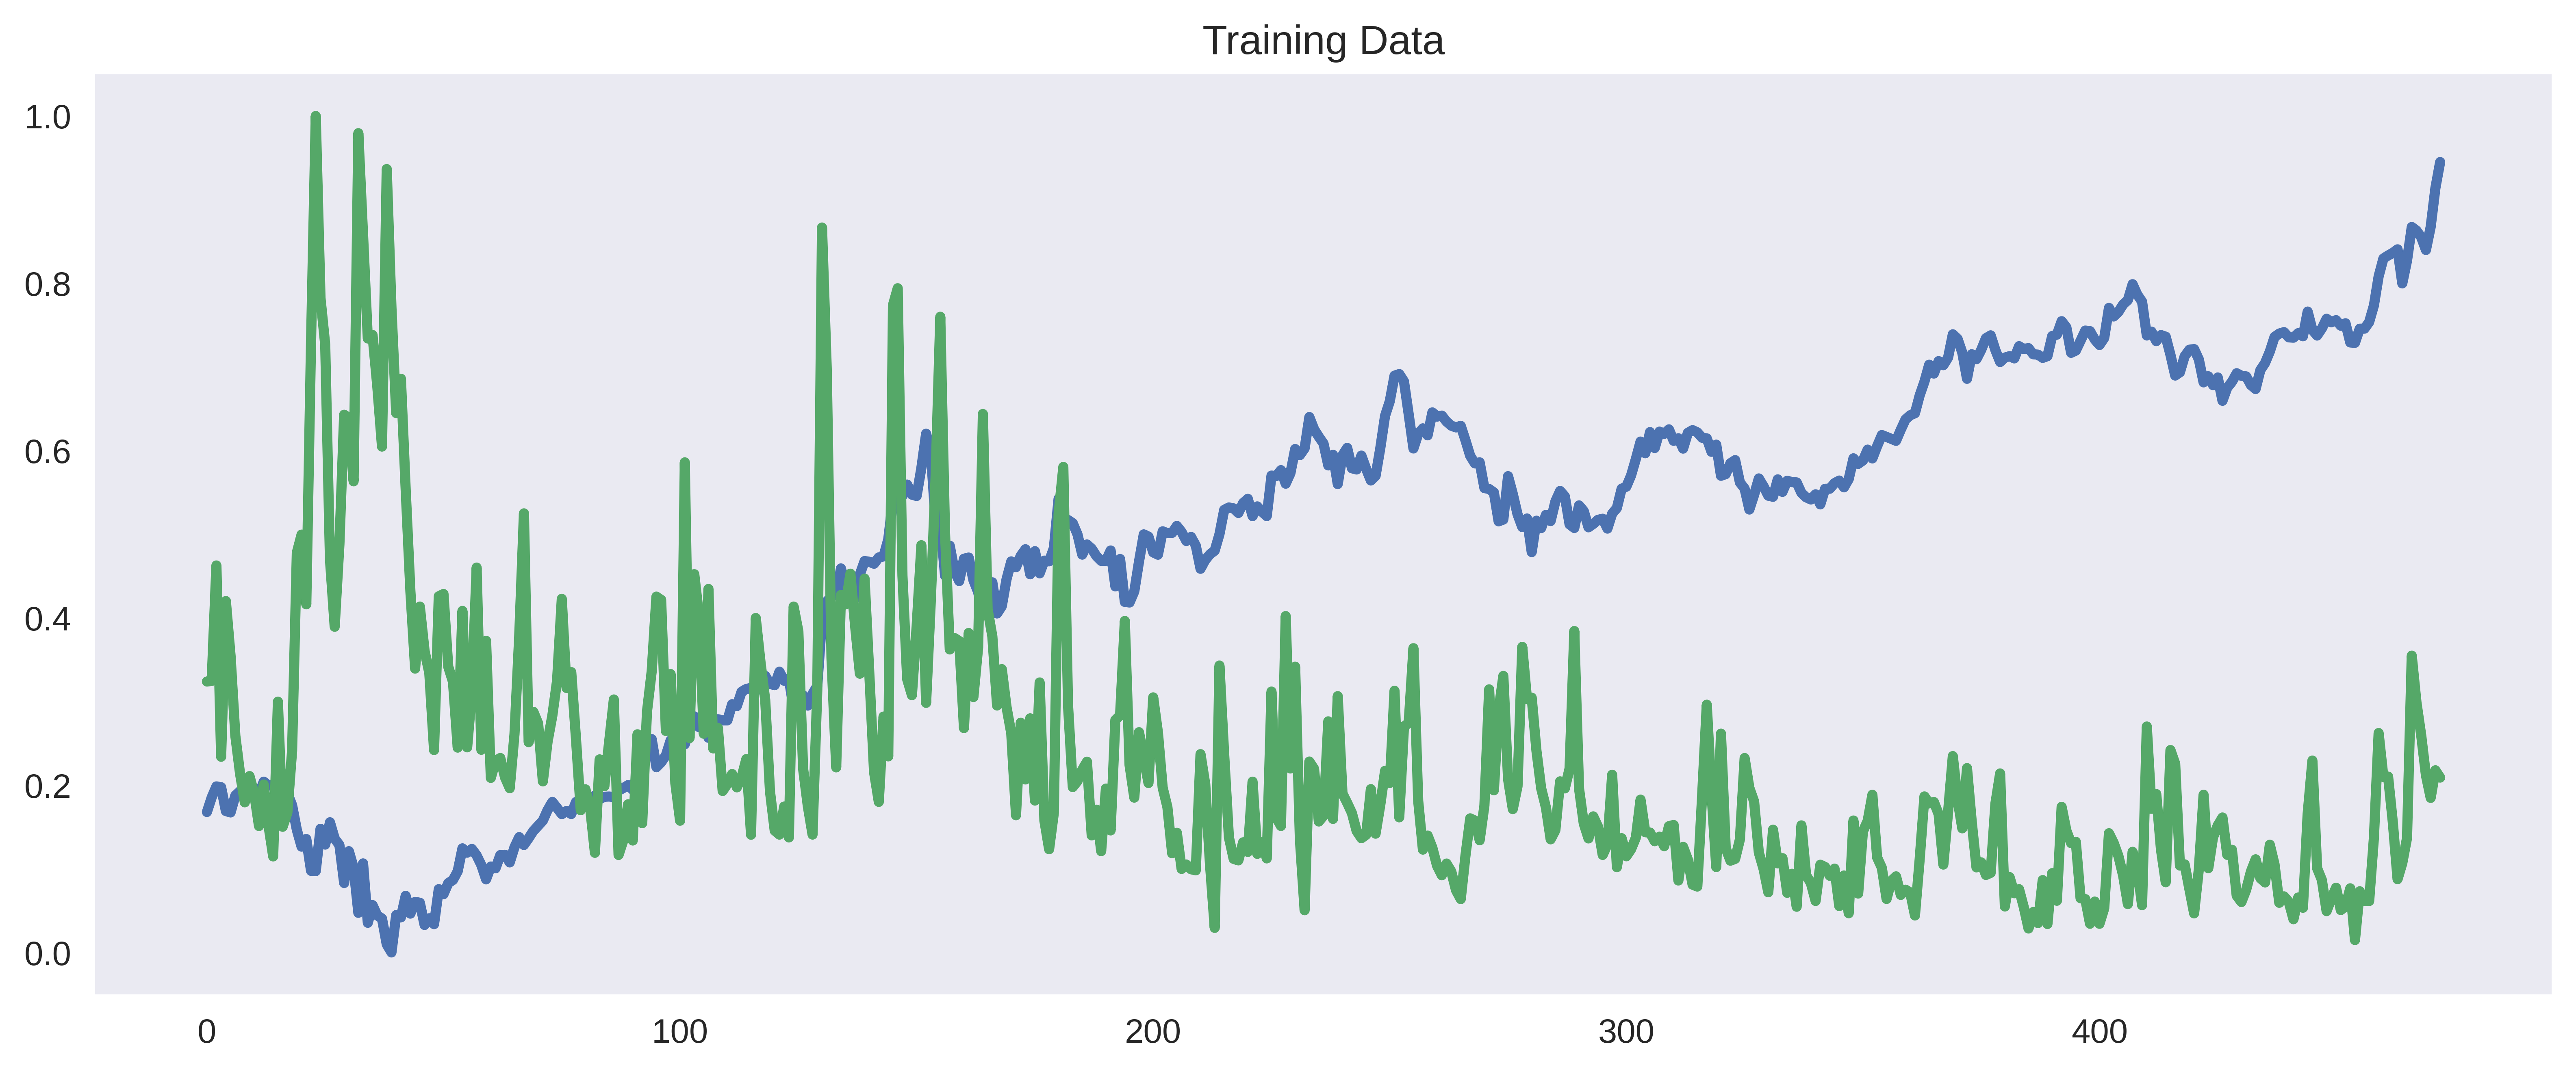

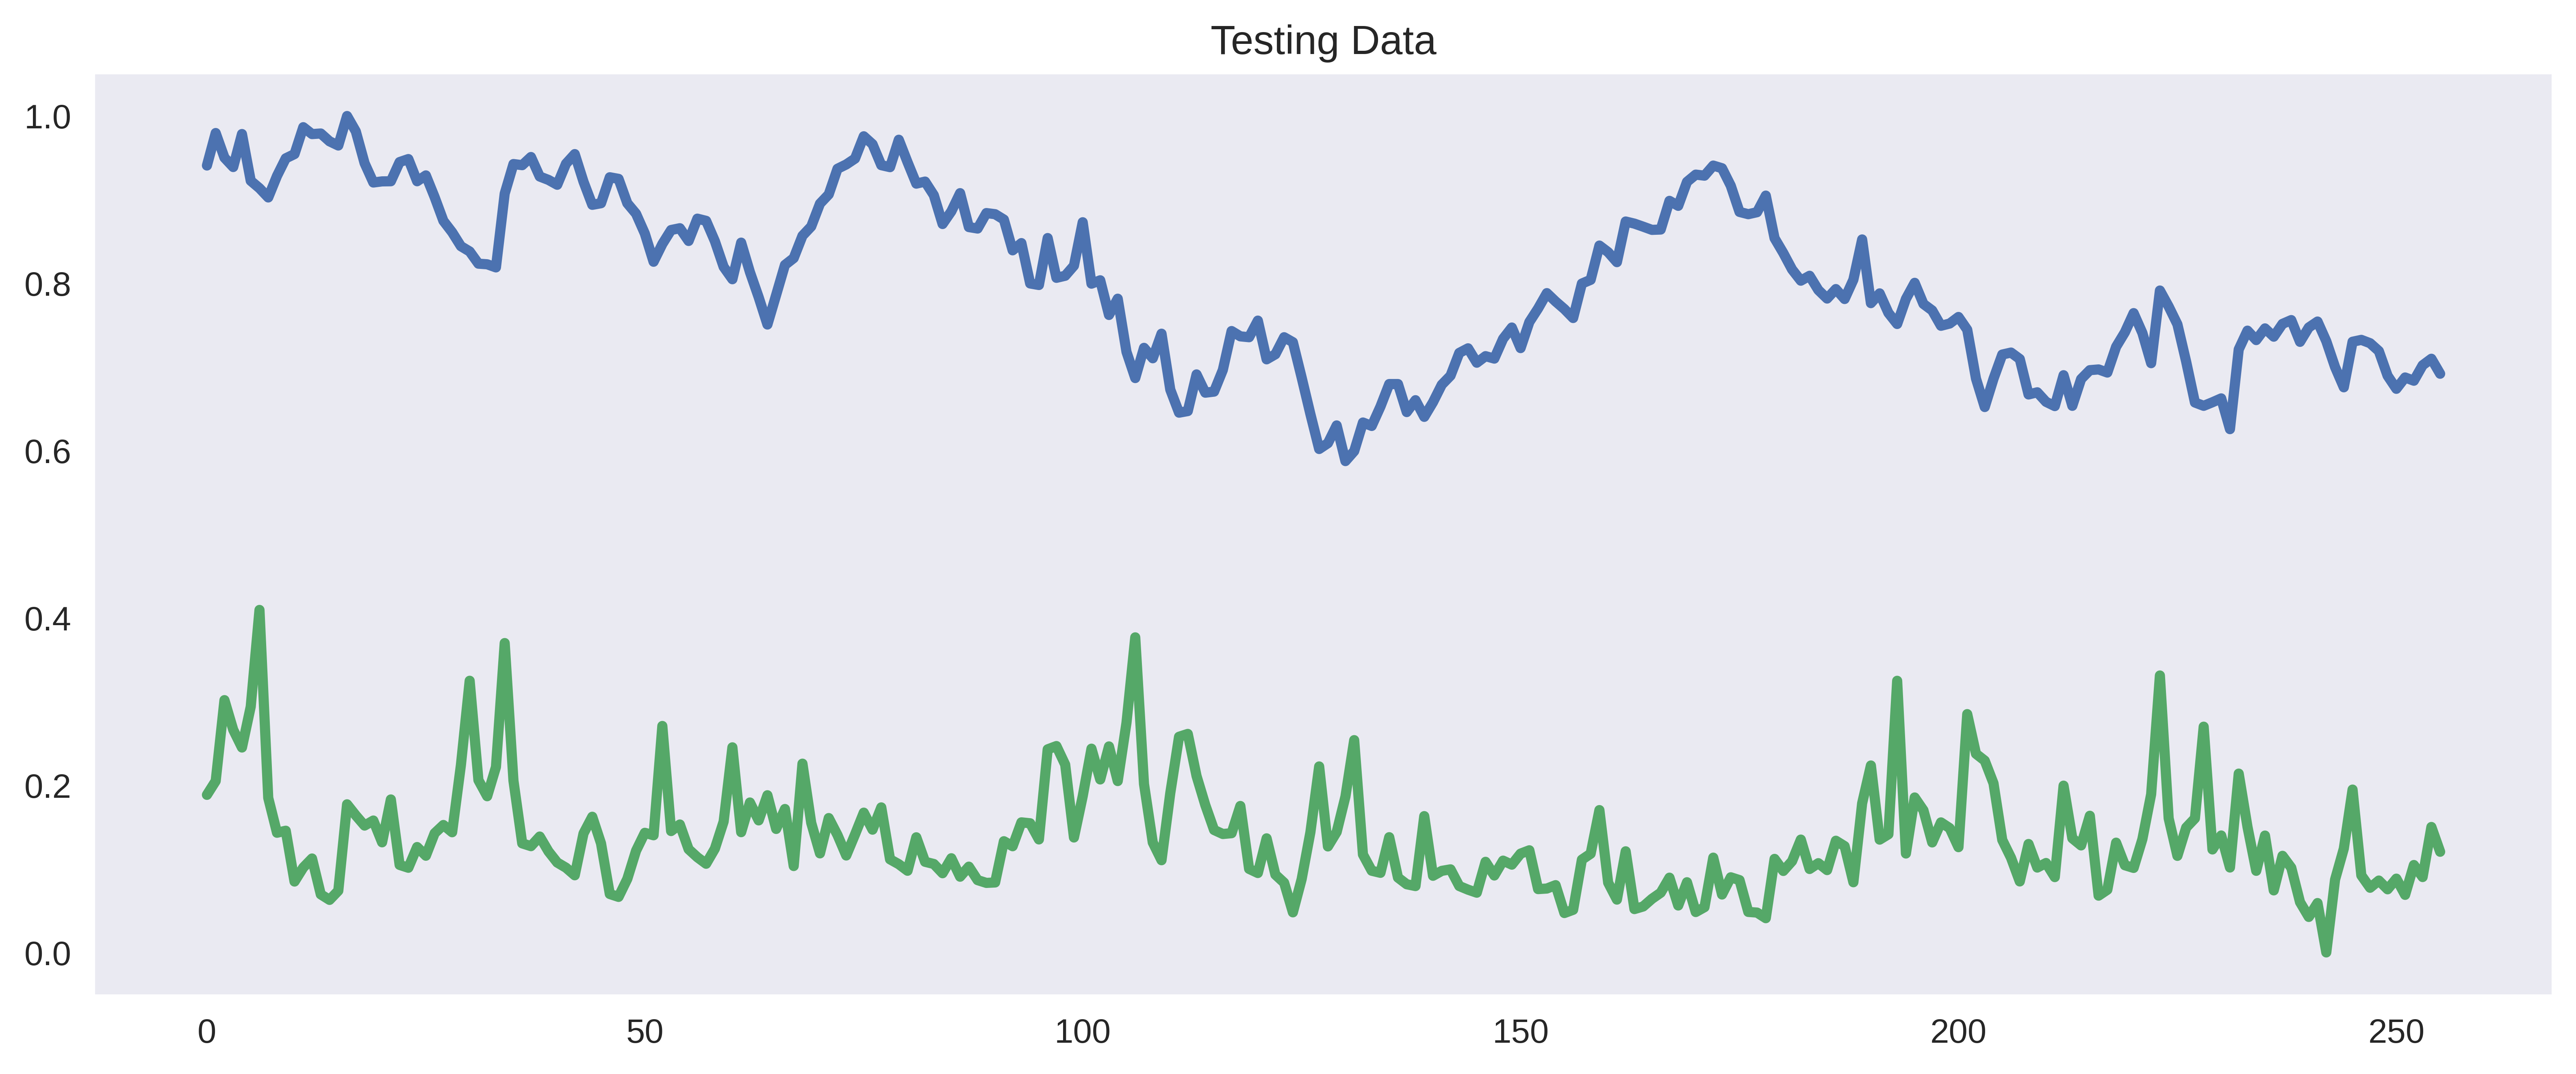

In [ ]:
# Define a data plotting function
def show_plot(data, title):
  plt.figure(figsize = (13, 5))
  plt.plot(data, linewidth = 3)
  plt.title(title)
  plt.grid()

show_plot(X_train, 'Training Data')
show_plot(X_test, 'Testing Data')

In [ ]:
from sklearn.linear_model import Ridge
# Note that Ridge regression performs linear least squares with L2 regularization.
# Create and train the Ridge Linear Regression  Model
regression_model = Ridge()

regression_model.fit(X_train, y_train)

Ridge()

In [ ]:
# Test the model and calculate its accuracy
lr_accuracy = regression_model.score(X_test, y_test)
print("Linear Regression Score: ", lr_accuracy)

Linear Regression Score:  0.9132959728327847


In [ ]:
# Make Prediction
predicted_prices = regression_model.predict(X)
predicted_prices

array([[0.18534347],
       [0.20158265],
       [0.20796739],
       [0.21702949],
       [0.18220532],
       [0.18348782],
       [0.20658706],
       [0.21340313],
       [0.2218915 ],
       [0.21088631],
       [0.21464177],
       [0.21269848],
       [0.22467423],
       [0.22244426],
       [0.22421829],
       [0.20509902],
       [0.22020185],
       [0.21328986],
       [0.19657303],
       [0.15860107],
       [0.13885572],
       [0.15098621],
       [0.10176174],
       [0.08970351],
       [0.14653699],
       [0.13130317],
       [0.16742573],
       [0.15265291],
       [0.14112377],
       [0.09183793],
       [0.12768952],
       [0.11253652],
       [0.04380971],
       [0.10448025],
       [0.04326799],
       [0.06291451],
       [0.05403558],
       [0.05366794],
       [0.01031824],
       [0.00846284],
       [0.05583712],
       [0.0515205 ],
       [0.08129508],
       [0.06669003],
       [0.08387708],
       [0.07968576],
       [0.05708329],
       [0.065

In [ ]:
# Append the predicted values into a list
Predicted = []
for i in predicted_prices:
  Predicted.append(i[0])

In [ ]:
len(Predicted)

729

In [ ]:
# Append the close values to the list
close = []
for i in price_volume_target_scaled_df:
  close.append(i[0])

In [ ]:
# Create a dataframe based on the dates in the individual stock data
df_predicted = price_volume_target_df[['Date']]
df_predicted

,Date
0,2020-01-27
1,2020-01-28
2,2020-01-29
3,2020-01-30
4,2020-01-31
...,...
724,2022-12-08
725,2022-12-09
726,2022-12-12
727,2022-12-13


In [ ]:
# Add the close values to the dataframe
df_predicted['Close'] = close
df_predicted

,Date,Close
0,2020-01-27,0.167927
1,2020-01-28,0.185280
2,2020-01-29,0.198483
3,2020-01-30,0.197550
4,2020-01-31,0.169039
...,...,...
724,2022-12-08,0.687414
725,2022-12-09,0.683523
726,2022-12-12,0.702027
727,2022-12-13,0.709810


In [ ]:
# Add the predicted values to the dataframe
df_predicted['Prediction'] = Predicted
df_predicted

,Date,Close,Prediction
0,2020-01-27,0.167927,0.185343
1,2020-01-28,0.185280,0.201583
2,2020-01-29,0.198483,0.207967
3,2020-01-30,0.197550,0.217029
4,2020-01-31,0.169039,0.182205
...,...,...,...
724,2022-12-08,0.687414,0.683558
725,2022-12-09,0.683523,0.678358
726,2022-12-12,0.702027,0.696336
727,2022-12-13,0.709810,0.701033


In [ ]:
# Function to plot interactive plots using Plotly Express
def interactive_plot(df, title):
  fig = px.line(title = title)
  for i in df.columns[1:]:
    fig.add_scatter(x = df['Date'], y = df[i], name = i)
  fig.show()

In [ ]:
# Plot the results
interactive_plot(df_predicted, "Original Vs. Prediction")

Red neuronal

TRAIN AN LSTM TIME SERIES MODEL

In [ ]:
data

,Date,Close,Volume,Target
0,2020-01-27,77.237503,161940000,79.422501
1,2020-01-28,79.422501,162234000,81.084999
2,2020-01-29,81.084999,216229200,80.967499
3,2020-01-30,80.967499,126743200,77.377502
4,2020-01-31,77.377502,199588400,77.165001
...,...,...,...,...
725,2022-12-09,142.160004,76097000,144.490005
726,2022-12-12,144.490005,70462700,145.470001
727,2022-12-13,145.470001,93886200,143.210007
728,2022-12-14,143.210007,82291200,136.500000


In [ ]:
price_volume_df = data
price_volume_df

,Date,Close,Volume,Target
0,2020-01-27,77.237503,161940000,79.422501
1,2020-01-28,79.422501,162234000,81.084999
2,2020-01-29,81.084999,216229200,80.967499
3,2020-01-30,80.967499,126743200,77.377502
4,2020-01-31,77.377502,199588400,77.165001
...,...,...,...,...
725,2022-12-09,142.160004,76097000,144.490005
726,2022-12-12,144.490005,70462700,145.470001
727,2022-12-13,145.470001,93886200,143.210007
728,2022-12-14,143.210007,82291200,136.500000


In [ ]:
# Get the close and volume data as training data (Input)
training_data = price_volume_df.iloc[:, 1:3].values
training_data

array([[7.72375030e+01, 1.61940000e+08],
       [7.94225010e+01, 1.62234000e+08],
       [8.10849990e+01, 2.16229200e+08],
       ...,
       [1.45470001e+02, 9.38862000e+07],
       [1.43210007e+02, 8.22912000e+07],
       [1.36500000e+02, 9.89319000e+07]])

In [ ]:
# Normalize the data
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler(feature_range = (0, 1))
training_set_scaled = sc.fit_transform(training_data)

In [ ]:
# Create the training and testing data, training data contains present day and previous day values
X = []
y = []
for i in range(1, len(price_volume_df)):
    X.append(training_set_scaled [i-1:i, 0])
    y.append(training_set_scaled [i, 0])

In [ ]:
X

[array([0.16792745]),
 array([0.18528007]),
 array([0.19848314]),
 array([0.19754999]),
 array([0.16903928]),
 array([0.16735166]),
 array([0.18758317]),
 array([0.19274529]),
 array([0.20021045]),
 array([0.18992596]),
 array([0.19294378]),
 array([0.18909205]),
 array([0.20416149]),
 array([0.19953542]),
 array([0.19969428]),
 array([0.18788097]),
 array([0.19705363]),
 array([0.190462]),
 array([0.17606765]),
 array([0.14654436]),
 array([0.12649154]),
 array([0.13556495]),
 array([0.09758372]),
 array([0.09726605]),
 array([0.14779519]),
 array([0.12895351]),
 array([0.15559791]),
 array([0.13610105]),
 array([0.12837772]),
 array([0.08299088]),
 array([0.12105149]),
 array([0.1013759]),
 array([0.04737229]),
 array([0.1064189]),
 array([0.03542004]),
 array([0.05656482]),
 array([0.04427503]),
 array([0.04052257]),
 array([0.00966905]),
 array([0.]),
 array([0.04469198]),
 array([0.0419918]),
 array([0.06764351]),
 array([0.04639945]),
 array([0.0604364]),
 array([0.05940397]),
 a

In [ ]:
# Convert the data into array format
X = np.asarray(X)
y = np.asarray(y)

In [ ]:
# Split the data
split = int(0.7 * len(X))
X_train = X[:split]
y_train = y[:split]
X_test = X[split:]
y_test = y[split:]

In [ ]:
# Reshape the 1D arrays to 3D arrays to feed in the model
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))
X_train.shape, X_test.shape

((510, 1, 1), (219, 1, 1))

In [ ]:
# Create the model
inputs = keras.layers.Input(shape=(X_train.shape[1], X_train.shape[2]))
x = keras.layers.LSTM(150, return_sequences= True)(inputs)
x = keras.layers.Dropout(0.3)(x)
x = keras.layers.LSTM(150, return_sequences=True)(x)
x = keras.layers.Dropout(0.3)(x)
x = keras.layers.LSTM(150)(x)
outputs = keras.layers.Dense(1, activation='linear')(x)

model = keras.Model(inputs=inputs, outputs=outputs)
model.compile(optimizer='adam', loss="mse")
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 1, 1)]            0         
                                                                 
 lstm (LSTM)                 (None, 1, 150)            91200     
                                                                 
 dropout (Dropout)           (None, 1, 150)            0         
                                                                 
 lstm_1 (LSTM)               (None, 1, 150)            180600    
                                                                 
 dropout_1 (Dropout)         (None, 1, 150)            0         
                                                                 
 lstm_2 (LSTM)               (None, 150)               180600    
                                                                 
 dense (Dense)               (None, 1)                 151   

In [ ]:
# Trai the model
history = model.fit(
    X_train, y_train,
    epochs = 20,
    batch_size = 32,
    validation_split = 0.2
)

Epoch 1/20
13/13 [==============================] - 8s 140ms/step - loss: 0.2030 - val_loss: 0.4531
Epoch 2/20
13/13 [==============================] - 0s 21ms/step - loss: 0.0695 - val_loss: 0.0234
Epoch 3/20
13/13 [==============================] - 0s 24ms/step - loss: 0.0284 - val_loss: 0.0661
Epoch 4/20
13/13 [==============================] - 0s 21ms/step - loss: 0.0199 - val_loss: 0.0482
Epoch 5/20
13/13 [==============================] - 0s 24ms/step - loss: 0.0146 - val_loss: 0.0246
Epoch 6/20
13/13 [==============================] - 0s 20ms/step - loss: 0.0101 - val_loss: 0.0155
Epoch 7/20
13/13 [==============================] - 0s 20ms/step - loss: 0.0066 - val_loss: 0.0036
Epoch 8/20
13/13 [==============================] - 0s 23ms/step - loss: 0.0036 - val_loss: 5.7579e-04
Epoch 9/20
13/13 [==============================] - 0s 25ms/step - loss: 0.0022 - val_loss: 7.6940e-04
Epoch 10/20
13/13 [==============================] - 0s 21ms/step - loss: 0.0019 - val_loss: 0.0039


In [ ]:
# Make prediction
predicted = model.predict(X)

23/23 [==============================] - 2s 5ms/step


In [ ]:
# Append the predicted values to the list
test_predicted = []

for i in predicted:
  test_predicted.append(i[0])

In [ ]:
test_predicted

[0.17556255,
 0.19145748,
 0.20362033,
 0.20275871,
 0.1765779,
 0.17503688,
 0.19357483,
 0.19832723,
 0.20521592,
 0.19573052,
 0.19851014,
 0.19496302,
 0.20886953,
 0.20459223,
 0.20473899,
 0.19384876,
 0.20230056,
 0.19622406,
 0.18300612,
 0.1561173,
 0.13802402,
 0.14619373,
 0.11218374,
 0.11190138,
 0.15725043,
 0.14023799,
 0.16433127,
 0.14667732,
 0.13972001,
 0.09924841,
 0.13313933,
 0.11555716,
 0.06798284,
 0.12005094,
 0.05758907,
 0.07601017,
 0.06528472,
 0.062020265,
 0.035362802,
 0.02707614,
 0.065647736,
 0.06329784,
 0.08572318,
 0.067135006,
 0.07939968,
 0.078495294,
 0.05535101,
 0.06227915,
 0.056211524,
 0.092764385,
 0.08745084,
 0.099072896,
 0.1024446,
 0.11170728,
 0.13618661,
 0.13151927,
 0.13554478,
 0.12862022,
 0.11820991,
 0.10311251,
 0.1167417,
 0.1148503,
 0.12892243,
 0.12927803,
 0.12113142,
 0.13739954,
 0.14825399,
 0.13979146,
 0.1471072,
 0.15500264,
 0.16052704,
 0.16613632,
 0.17770252,
 0.18657263,
 0.180026,
 0.17320707,
 0.17663231,

In [ ]:
df_predicted = price_volume_df[1:][['Date']]
df_predicted

,Date
1,2020-01-28
2,2020-01-29
3,2020-01-30
4,2020-01-31
5,2020-02-03
...,...
725,2022-12-09
726,2022-12-12
727,2022-12-13
728,2022-12-14


In [ ]:
df_predicted['predictions'] = test_predicted

In [ ]:
df_predicted

,Date,predictions
1,2020-01-28,0.175563
2,2020-01-29,0.191457
3,2020-01-30,0.203620
4,2020-01-31,0.202759
5,2020-02-03,0.176578
...,...,...
725,2022-12-09,0.694572
726,2022-12-12,0.690367
727,2022-12-13,0.710399
728,2022-12-14,0.718854


In [ ]:
# Plot the data
close = []
for i in training_set_scaled:
  close.append(i[0])

In [ ]:
df_predicted['Close'] = close[1:]

In [ ]:
df_predicted

,Date,predictions,Close
1,2020-01-28,0.175563,0.185280
2,2020-01-29,0.191457,0.198483
3,2020-01-30,0.203620,0.197550
4,2020-01-31,0.202759,0.169039
5,2020-02-03,0.176578,0.167352
...,...,...,...
725,2022-12-09,0.694572,0.683523
726,2022-12-12,0.690367,0.702027
727,2022-12-13,0.710399,0.709810
728,2022-12-14,0.718854,0.691862


In [ ]:
# Plot the data
interactive_plot(df_predicted, "Original Vs LSTM Prediction")